In [64]:
%load_ext autoreload
%autoreload 2
# Import some standard python libraries
import sys
import matplotlib.pyplot as plt

# Import some custom libraries for this example
sys.path.insert(0, "../")
from src.ml_tools import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [65]:
data_dir = "/Users/nickkamp/Documents/Harvard/Research/Prometheus/PublicDatasets/IceCube_HE"
MLHelper = MLHelper("%s/MuMinus/reduced_muons.parquet"%data_dir,
                    "%s/EMinus/reduced_electrons.parquet"%data_dir)

In [97]:
MLHelper.MakeNetwork(width=1000)
MLHelper.MakeTrainingDataset(3000)

Created neural network with 1947213 trainable parameters


Beginning epoch 1/2

Beginning epoch 2/240



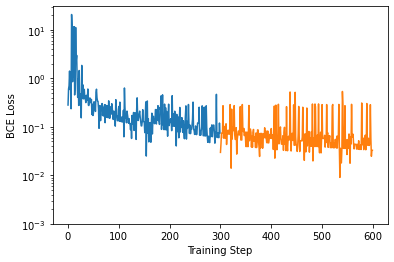

In [98]:
loss_dict = MLHelper.train(num_epochs=2)
for epoch,losses in loss_dict.items():
    plt.plot(epoch*len(losses)+np.arange(len(losses)),np.array(losses))
plt.semilogy()
plt.ylabel("BCE Loss")
plt.xlabel("Training Step")
plt.ylim(1e-3)
plt.show()

In [99]:
event_no = 14
MLHelper.plot_event(event_no,
                    reveal_network_predition=True,
                    reveal_true_label=True)

In [100]:
pred_label = []
true_label = []
for input,target in MLHelper.train_dataloader:
    output = MLHelper.net(input).detach().numpy()
    true_label += list(target[:,0])
    pred_label += list(output[:])

In [101]:
pred_label_test = []
true_label_test = []
for input,target in MLHelper.test_dataloader:
    output = MLHelper.net(input).detach().numpy()
    true_label_test += list(target[:,0])
    pred_label_test += list(output[:])

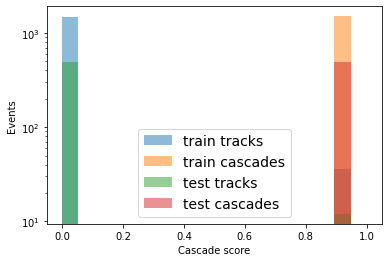

In [102]:
pred = np.array(pred_label,dtype=float)
true = np.array(true_label,dtype=float)
pred_test = np.array(pred_label_test,dtype=float)
true_test = np.array(true_label_test,dtype=float)
plt.hist(pred[true==0],alpha=0.5,bins=np.linspace(0,1,20),label="train tracks")
plt.hist(pred[true==1],alpha=0.5,bins=np.linspace(0,1,20),label="train cascades")
plt.hist(pred_test[true_test==0],alpha=0.5,bins=np.linspace(0,1,20),label="test tracks")
plt.hist(pred_test[true_test==1],alpha=0.5,bins=np.linspace(0,1,20),label="test cascades")
plt.xlabel("Cascade score")
plt.ylabel("Events")
plt.semilogy()
plt.legend(fontsize=14)
plt.show()
# plt.hist2d(true_azimuth,pred_azimuth,bins=np.linspace(-np.pi,np.pi,50))
# plt.show()